In [48]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import cv2

In [2]:
def plot_image(img):
    plt.imshow(img, cmap = 'gray', vmin=0, vmax=255)
    plt.title(''), plt.xticks([]), plt.yticks([])

def plot_image_and_hist(img):
    plt.subplot(121)
    plt.imshow(img, cmap = 'gray', vmin=0, vmax=255)
    plt.title(''), plt.xticks([]), plt.yticks([])

    plt.subplot(122)
    plt.hist(img.ravel(),256,[0,256]); plt.show()
    
def plot_hist_and_cum(img):
    hist = np.histogram(img, bins=np.arange(256))
    fig, ax1 = plt.subplots()
    #ax1.fill_between(hist[1][1:], 0, hist[0])
    ax1.bar(hist[1][1:], hist[0])
    ax2 = ax1.twinx()
    ax2.plot(hist[1][1:], np.cumsum(hist[0]), color='red')

def linearTrans(img, alpha, beta, dmin=0, dmax=255):
    return np.uint8(np.clip(alpha*img + beta, dmin, dmax-1))

def linearGradient(img, dmin=0, dmax=255):
    pattern = np.transpose(np.array([np.arange(img.shape[0])]).repeat(img.shape[1],0)/img.shape[0])
    pattern = np.flip(pattern)
    return np.uint8(np.clip(pattern*img, dmin, dmax-1))

def blend(img1, img2, alpha, dmin=0, dmax=255):
    return np.uint8(np.clip((1.0-alpha)*img1 + alpha*img2, dmin, dmax-1))

def linearBlend(img1, img2, dmin=0, dmax=255):
    pattern = np.array([np.arange(img1.shape[1])]).repeat(img1.shape[0],0)/img1.shape[1]
    return np.uint8(np.clip((-pattern+1)*img1 + pattern*img2, dmin, dmax-1))

def gammaCorrection(img, gamma, dmin=0, dmax=255):
    return np.uint8(np.clip(((img/dmax)**(1.0/gamma))*dmax, dmin, dmax-1))

def negative(img, dmin=0, dmax=255):
    return np.uint8(np.clip(-img+dmax, dmin, dmax-1))

# Processing in the Spatial Domain


## Color models

Color models are mathematical representations of the color captured by a camera.

## RGB

Represents any color as the set of red, green and blue intensities. It use to be the model that a camera or color sensor gives. Each channel is usually represented for integer in the range [0, 155] for 8 bits systems, or floating point number in the range [0, 1].

<div class="picture">
  <img style="width:90%;" src ="./images/1_rgb_cube.png" />
  <div>RGB cube. (https://commons.wikimedia.org/wiki/File:RGB_color_cube.svg)</div>
</div>

Examples:

<p style="background-color:rgb(0, 0, 0);">rgb(0, 0, 0)</p>
<p style="background-color:rgb(255, 0, 0);">rgb(255, 0, 0)</p>
<p style="background-color:rgb(0, 255, 0);">rgb(0, 255, 0)</p>
<p style="background-color:rgb(0, 0, 255);">rgb(0, 0, 255)</p>
<p style="background-color:rgb(255, 255, 0);">rgb(255, 255, 0)</p>
<p style="background-color:rgb(255, 0, 255);">rgb(255, 0, 255)</p>
<p style="background-color:rgb(0, 255, 255);">rgb(0, 255, 255)</p>
<p style="background-color:rgb(255, 255, 255);">rgb(255, 255, 255)</p>

## HSV and HSL

***Hue, Saturation, Value*** model and ***Hue, Saturation, Lightness*** models represents the color with the corresponding components. 

<div class="picture">
  <img style="width:60%;" src ="./images/1_hls_hsv.png" />
  <div>HSL and HSV representations. (https://en.wikipedia.org/wiki/Color_model)</div>
</div>


Examples:

<p style="background-color:rgb(0, 0, 0); color:rgb(255, 255, 255);">hsl(0, 100%, 0%)</p>
<p style="background-color:rgb(128, 0, 0); color:rgb(255, 255, 255);">hsl(0, 100%, 25%)</p>
<p style="background-color:rgb(255, 0, 0);">hsl(0, 100%, 50%)</p>
<p style="background-color:rgb(255, 128, 128);">hsl(0, 100%, 75%)</p>
<p style="background-color:rgb(255, 255, 255);">hsl(0, 100%, 100%)</p>

<p style="background-color:rgb(0, 0, 0); color:rgb(255, 255, 255);">hsl(120, 100%, 0%)</p>
<p style="background-color:rgb(0, 128, 0); color:rgb(255, 255, 255);">hsl(120, 100%, 25%)</p>
<p style="background-color:rgb(0, 255, 0);">hsl(120, 100%, 50%)</p>
<p style="background-color:rgb(128, 255, 128);">hsl(120, 100%, 75%)</p>
<p style="background-color:rgb(255, 255, 255);">hsl(120, 100%, 100%)</p>

<p style="background-color:rgb(0, 0, 0); color:rgb(255, 255, 255);">hsl(240, 100%, 0%)</p>
<p style="background-color:rgb(0, 0, 128); color:rgb(255, 255, 255);">hsl(240, 100%, 25%)</p>
<p style="background-color:rgb(0, 0, 255);">hsl(240, 100%, 50%)</p>
<p style="background-color:rgb(128, 128, 255);">hsl(240, 100%, 75%)</p>
<p style="background-color:rgb(255, 255, 255);">hsl(240, 100%, 100%)</p>





## YUV

<div class="picture">
  <img style="width:40%;" src ="images/1_YUV.png" />
  <div>YUV representation with Y=0.5 (https://es.wikipedia.org/wiki/YUV)</div>
</div>

<div class="picture">
  <img style="width:40%;" src ="images/1_YUV0.png" />
  <div>YUV representation with Y=0.0</div>
</div>

<div class="picture">
  <img style="width:40%;" src ="images/1_YUV1.png" />
  <div>YUV representation with Y=1.0</div>
</div>

# Point Operators

Point operators (or point processes) are the simplest way to process image. The result of these operators is calculated from the corresponding pixel in the original image. The point operators produces pixels tranforms, that can be denoted as:

$$g(\mathbf{x})=h(f(\mathbf{x}))$$

or:

$$g(\mathbf{x})=h(f_0(\mathbf{x}), f_1(\mathbf{x}), ...)$$

Where $\mathbf{x}$ is the pixel location $(i,j)$, $g$ is the output image and $f(f)$ is the input images.

### Brightness and contrast

The commonly transformation is:

$$g(\mathbf{x})=af(\mathbf{x})+b$$

Whose parameters are:

* $a$: gain, that controls *contrast*.
* $b$: bias, that controls *brightness*.

Examples:

* ***Original Image***:

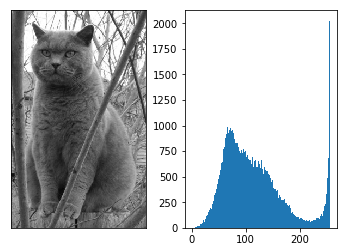

In [3]:
imgCat = cv2.imread('images/cat.jpg', 0)
imgDog = cv2.imread('images/dog.jpg', 0)
plot_image_and_hist(imgCat)

* $a=1.0, b=70$

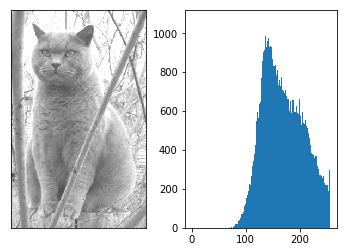

In [4]:
a=1.0
b=70
imgCat1 = np.clip(imgCat+70.0, a_min=None,a_max=255.0)
imgCat1 = a*imgCat+b
plot_image_and_hist(imgCat1)
imgCat1 = np.clip(imgCat1, 0.0, 255.0).astype(np.uint8) # Limits the operated image between 0 and 255

* $a=1.5, b=0$

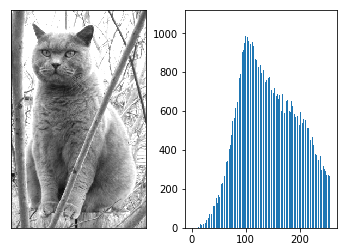

In [5]:
a=1.5
b=0
imgCat1 = np.clip(imgCat+70.0, a_min=None,a_max=255.0)
imgCat1 = a*imgCat+b
plot_image_and_hist(imgCat1)
imgCat1 = np.clip(imgCat1, 0.0, 255.0).astype(np.uint8) # Limits the operated image between 0 and 255

* $a=2.0, b=-50$

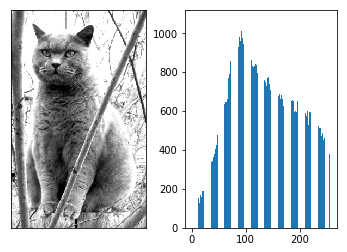

In [6]:
a=2.0
b=-50
imgCat1 = np.clip(imgCat+70.0, a_min=None,a_max=255.0)
imgCat1 = a*imgCat+b
plot_image_and_hist(imgCat1)
imgCat1 = np.clip(imgCat1, 0.0, 255.0).astype(np.uint8) # Limits the operated image between 0 and 255

The parameters can depend on the $x$ location:

$$g(\mathbf{x}) = a(\mathbf{x})f(\mathbf{x})+b(\mathbf{x})$$

Example:

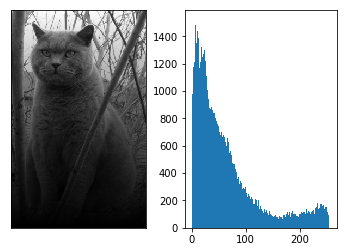

In [7]:
imgCat1 = linearGradient(imgCat)
plot_image_and_hist(imgCat1)

As this is a linear transformation, the superposition principle is satisfied:

$$h(f_0+f_1) = h(f_0) + h(f_1)$$

### Blend

It is used to combine two images:

$$g(\mathbf{x}) = (1-\alpha)f_0(\mathbf{x})+\alpha f_1(\mathbf{x})$$

Where $\alpha$; goes from $0$ to $1$.

Examples:

* $\alpha=0.25$

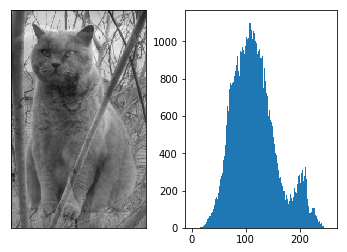

In [8]:
alpha = 0.25
img_out = blend(imgCat, imgDog, alpha)
plot_image_and_hist(img_out)

* $\alpha=0.5$

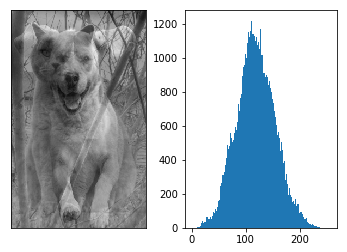

In [9]:
alpha = 0.5
img_out = blend(imgCat, imgDog, alpha)
plot_image_and_hist(img_out)

* $\alpha=0.75$

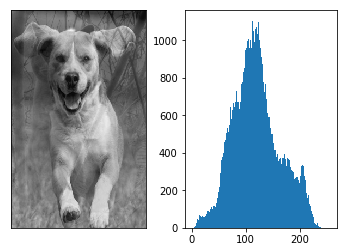

In [10]:
alpha = 0.75
img_out = blend(imgCat, imgDog, alpha)
plot_image_and_hist(img_out)

* $\alpha$ changes with $x$

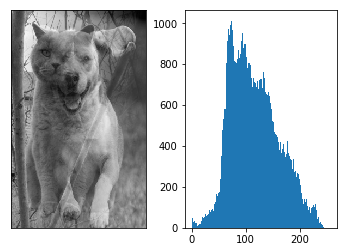

In [11]:
alpha = 0.75
img_out = linearBlend(imgCat, imgDog)
plot_image_and_hist(img_out)

### Gamma correction

Used to invert the gamma mapping applied by some cameras:

<img class="eq" src="https://latex.codecogs.com/gif.latex?
  g(\mathbf{x}) = f(\mathbf{x})^{\frac{1}{\gamma}}
"/>

<div class="picture">
  <img style="width:60%;" src ="./images/1_gamma_curve.png" />
  <div>gamma=[1.0, 0.8, 2.2]</div>
</div>

When input image $f$ is normalized in the range $[0, 1]$.

Example:

* $\gamma=[1.0, 0.8, 2.2]$

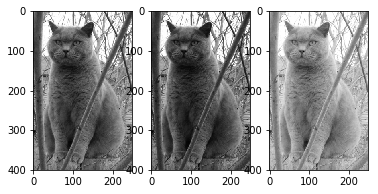

In [12]:
plt.subplot(1, 3, 1)
plt.imshow(gammaCorrection(imgCat, 1.0), cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(gammaCorrection(imgCat, 0.8), cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(gammaCorrection(imgCat, 2.2), cmap = 'gray')
plt.show()

### Negative

Output is:

<img class="eq" src="https://latex.codecogs.com/gif.latex?
  g(\mathbf{x}) = L-f(\mathbf{x})-1
"/>

Example:

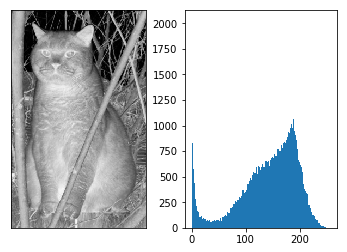

In [13]:
img_out = negative(imgCat)
plot_image_and_hist(img_out)


## Color transforms

When you think about adding brightness to a color image, the first operation you could apply is to add a specific value to all the channels. Let's with the following color:

<p style="background-color:rgb(123, 66, 163); color: white;">rgb(123, 66, 163)</p>

Adding 50 to each channel, you get:

<p style="background-color:rgb(173, 116, 213); color: white;">rgb(173, 116, 213)</p>

In both cases, you could convert to HSV or HSL models [here](https://www.rapidtables.com/convert/color/rgb-to-hsv.html), and check that the Hue value is the same, and the Saturation and Value or Lightness change, if you want to change just one of them, you sould convert to HSV or HSL models, change the specific value, and return to RGB again.

Example:

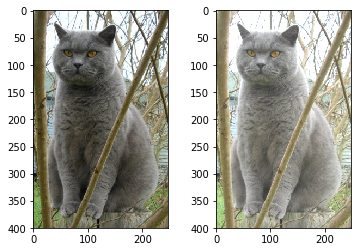

In [14]:
img_rgb = cv2.imread('images/cat.jpg')
plt.subplot(1, 2, 1)
plt.imshow(img_rgb[...,::-1])
plt.subplot(1, 2, 2)
plt.imshow(linearTrans(img_rgb, 1.0, 50)[...,::-1])
plt.show()

## Histogram equalization

The histogram is essentially a probability function, and the idea of the histogram equalization is to convert it in a flat function, using all the intensities. This operation can be done calculating the normalized distribution function, and multiplying it by $L-1$. This could be used as a LUT to map the new pixel values.

$$c(I)=(L-1)\frac{1}{N}\sum^{i=0}_{I}{h(i)}$$

Where $h$ is the original histogram, and $c$ should be the LUT.

Consider thw following image and its histogram:

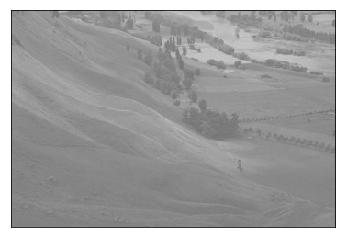

In [15]:
imgGray = cv2.imread('images/bad_contrast.png', 0)
plot_image(imgGray)

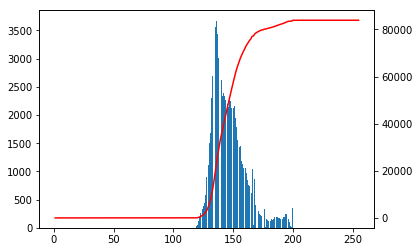

In [16]:
plot_hist_and_cum(imgGray)

Applying histogram equalization:

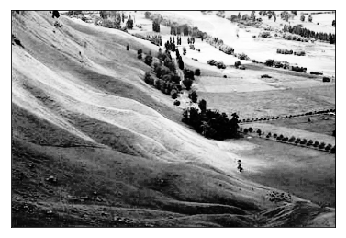

In [17]:
imgGrayEqu = cv2.equalizeHist(imgGray)
plot_image(imgGrayEqu)

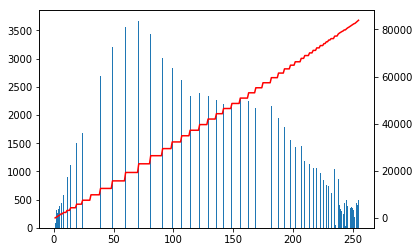

In [18]:
plot_hist_and_cum(imgGrayEqu)


Sometimes the histogram equalization does not work well enough, so you can parform blend between the original and the equalized image.

<div class="picture">
  <img style="width:90%;" src ="images/1_eqblend.png" />
  <div>[Szeliski11]</div>
</div>

Other methods:

<div class="picture">
  <img style="width:90%;" src ="images/1_eqlocal.png" />
  <div>[Szeliski11]</div>
</div>

# Linear filtering (neighborhood operator)

Linear filters can be performed as a correlation operation:

$$g = f \otimes h$$

$$g(i,j) = \sum_{k,l}f(i+k, j+l)h(k,l)$$

Where $g$ is the filtered image, $f$ is the original image and $h$ is the filter, whose value are called *filter coefficients*, and **the sum of them must be *1.0***.

<div class="picture">
  <img style="width:90%;" src ="images/1_linear_filter.png" />
  <div>[Szeliski11]</div>
</div>

The linear filter can also be executed as a convolution operation:

$$g = f \ast h$$

$$g(i,j) = \sum_{k,l}f(i-k, j-l)h(k,l) = \sum_{k,l}f(k, l)h(i-k,j-l)$$

Correlation and convolution are shift-invariant operations, but a shift-variant version could be used:

$$g(i,j) = \sum_{k,l}f(i-k, j-l)h(k,l;i,j)$$


## Padding (border effect)

When border pixel are calculated, the filter need pixels that outside the image, there are some processes to face this problem:

* ***zero***: read the outside pixels as zero.
* ***constant***: read the outside pixels as a specific value, usually L/2.
* ***clamp***: repeat the border pixels.
* ***wrap***: loop “around” the image in a “toroidal” configuration.
* ***mirror***: reflect the image.

<div class="picture">
  <img style="width:90%;" src ="images/1_padding.png" />
  <div>[Szeliski11]</div>
</div>

## Typical filters

### Average (mean) filter

It is an squared filter with the same value in all its cells, and whose sum is 1.0.

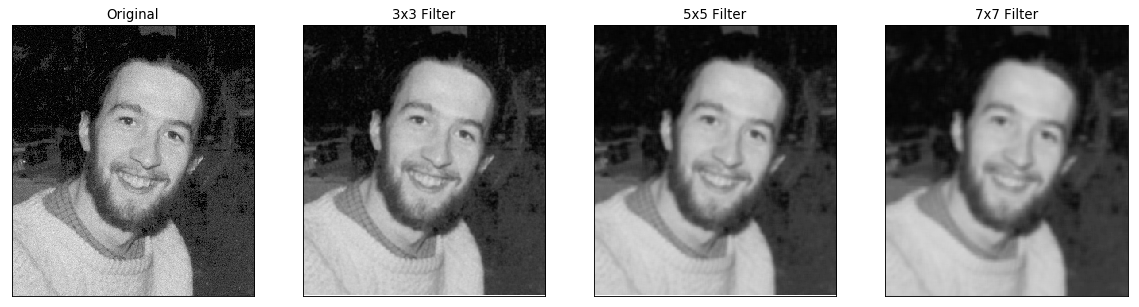

In [56]:
from scipy import signal

def mean_filter(img, N):
    kernel = np.ones((N,N))/(N*N)
    return signal.convolve2d(imgFace1, kernel, boundary='symm', mode='same')

imgFace1 = cv2.imread('images/1_face1.jpg', 0)
fig=plt.figure(figsize=(18, 16), dpi= 80)
plt.subplot(141)
plot_image(imgFace1)
plt.title('Original')

sizes = [3, 5, 7]

for i, size in enumerate(sizes):
    plt.subplot(142+i)
    filtered = mean_filter(imgFace1, size)
    plot_image(filtered)
    plt.title(f'{size}x{size} Filter')

Original image from https://homepages.inf.ed.ac.uk/rbf/HIPR2/filtops.htm

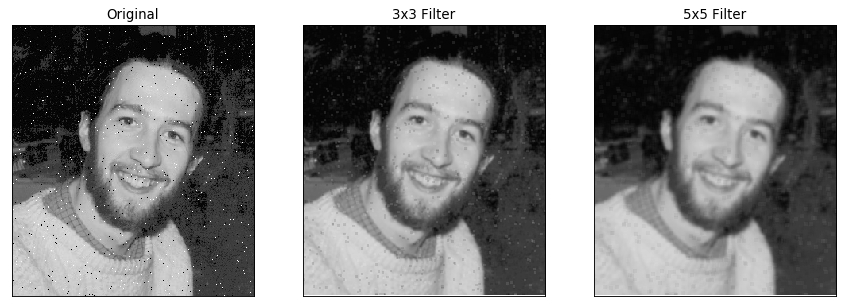

In [57]:
imgFace1 = cv2.imread('images/1_face2.jpg', 0)
fig=plt.figure(figsize=(18, 16), dpi= 80)
plt.subplot(141)
plot_image(imgFace1)
plt.title('Original')

sizes = [3, 5]

for i, size in enumerate(sizes):
    plt.subplot(142+i)
    filtered = mean_filter(imgFace1, size)
    plot_image(filtered)
    plt.title(f'{size}x{size} Filter')

Original image from https://homepages.inf.ed.ac.uk/rbf/HIPR2/filtops.htm

### Gaussian filter

Modeled by:

$$G(x, y) = \frac{1}{2 \pi \sigma^2} e ^ {-\frac{x^2 + y^2}{2 \sigma^2}}$$

<div class="picture">
  <img style="width:35%;" src ="images/1_gauss_plot.png" />
</div>

Values example:

<div class="picture">
  <img style="width:25%;" src ="images/1_gauss_table.png" />
</div>

Implementation:

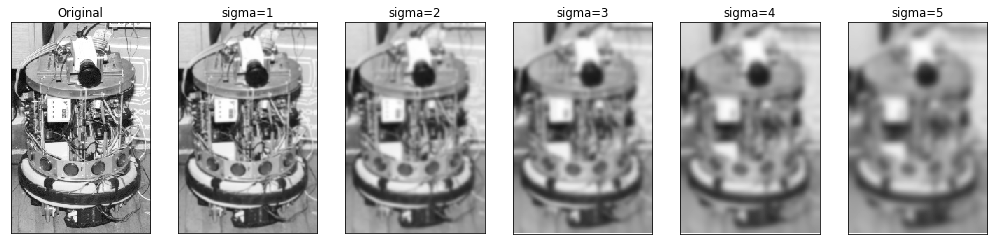

In [86]:
from scipy.ndimage import gaussian_filter

imgRobot = cv2.imread('images/1_camera.jpg', 0)
fig=plt.figure(figsize=(18, 16), dpi= 70)
plt.subplot(161)
plot_image(imgRobot)
plt.title('Original')

sigmas = [1, 2, 3, 4, 5]

for i, sigma in enumerate(sigmas):
    plt.subplot(162+i)
    filtered = result = gaussian_filter(imgRobot, sigma=sigma)
    plot_image(filtered)
    plt.title(f'sigma={sigma}')



### Sobel filters

Gradients in $x$ and $y$ are calculated.

<div class="picture">
  <img style="width:50%;" src ="images/1_sobel_eq.png" />
</div>

Then, the magnitude and direction can be computed:

<div class="picture">
  <img style="width:15%;" src ="images/1_sobel_mg.png" />
  <img style="width:15%;" src ="images/1_sobel_ph.png" />
</div>

Text(0.5, 1.0, 'Gy')

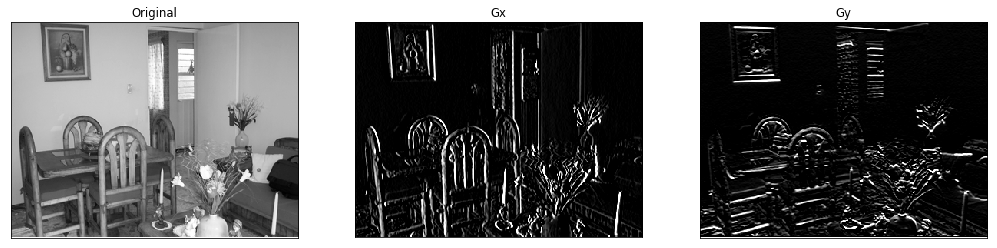

In [98]:
imgSobel1 = cv2.imread('images/1_sobel1.png', 0)
gx = cv2.Sobel(imgSobel1, cv2.CV_32F, 1, 0)
gy = cv2.Sobel(imgSobel1, cv2.CV_32F, 0, 1)
mag, ang = cv2.cartToPolar(gx, gy)

fig=plt.figure(figsize=(18, 16), dpi= 70)

plt.subplot(131)
plot_image(imgSobel1); plt.title('Original')
plt.subplot(132)
plot_image(gx); plt.title('Gx')
plt.subplot(133)
plot_image(gy); plt.title('Gy')

Text(0.5, 1.0, 'Phase')

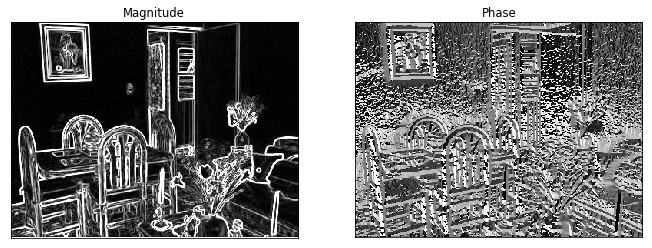

In [104]:
fig=plt.figure(figsize=(18, 16), dpi= 70)

plt.subplot(131)
plot_image(mag); plt.title('Magnitude')
plt.subplot(132)
plot_image(255*ang/ang.max()); plt.title('Phase')